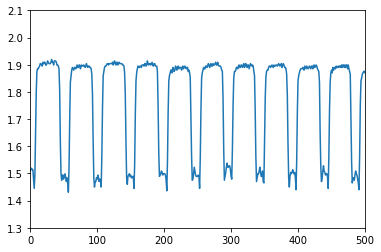

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

sig1=[]
sig2=[]
t = []
i=0

with open('12-11/B-ol10-aq30-pause10.csv') as data:
    for sig in csv.reader(data, delimiter='	'):
        #print(sig)
        sig[0] = sig[0].replace('.','').replace(',','.')
        sig[1] = sig[1].replace('.','').replace(',','.')
        sig[2] = sig[2].replace('.','').replace(',','.')
        #print(sig)
        sig1.append(float(sig[0]))
        sig2.append(float(sig[1]))
        t.append(float(sig[2]))
sig1 = np.array(sig1)
sig2 = np.array(sig2)
t = np.array(t)
        

plt.plot(sig1)
plt.ylim(1.3, 2.1)
plt.xlim(0, 500)
plt.show()
        


[1.29035 1.30305 1.31575 1.32845 1.34115 1.35385 1.36655 1.37925 1.39195
 1.40465 1.41735 1.43005 1.44275 1.45545 1.46815 1.48085 1.49355 1.50625
 1.51895 1.53165 1.54435 1.55705 1.56975 1.58245 1.59515 1.60785 1.62055
 1.63325 1.64595 1.65865 1.67135 1.68405 1.69675 1.70945 1.72215 1.73485
 1.74755 1.76025 1.77295 1.78565 1.79835 1.81105 1.82375 1.83645 1.84915
 1.86185 1.87455 1.88725 1.89995 1.91265] 

[1.284  1.2967 1.3094 1.3221 1.3348 1.3475 1.3602 1.3729 1.3856 1.3983
 1.411  1.4237 1.4364 1.4491 1.4618 1.4745 1.4872 1.4999 1.5126 1.5253
 1.538  1.5507 1.5634 1.5761 1.5888 1.6015 1.6142 1.6269 1.6396 1.6523
 1.665  1.6777 1.6904 1.7031 1.7158 1.7285 1.7412 1.7539 1.7666 1.7793
 1.792  1.8047 1.8174 1.8301 1.8428 1.8555 1.8682 1.8809 1.8936 1.9063
 1.919 ]
1.84915 2492.0


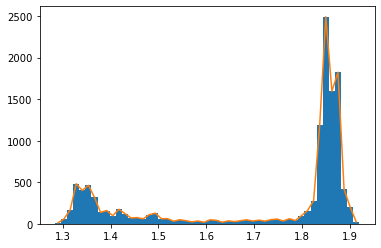

In [2]:
#histogram plot
nbins =50
plt.figure()
freq,bins,p = plt.hist(sig1, nbins)


x = 0.5 *(bins[:-1] + bins[1:])
print(x,'\n')
print(bins)
x_max1 = x[np.argmax(freq)]
max_freq1 = np.max(freq)
  
print(x_max1, max_freq1)

plt.plot(x,freq)
#plt.plot([x_max1]*2,[0,max_freq1],color='black')
# plt.plot([x_max2]*2,[0,max_freq2],color='black')

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 107
    # data points      = 50
    # variables        = 6
    chi-square         = 904828.071
    reduced chi-square = 20564.2743
    Akaike info crit   = 502.173861
    Bayesian info crit = 513.645999
[[Variables]]
    g1_amplitude:  29.7715558 +/- 6.02347093 (20.23%) (init = 124.6)
    g1_center:     1.34676823 +/- 0.00602480 (0.45%) (init = 1.35258)
    g1_sigma:      0.02586706 +/- 0.00607832 (23.50%) (init = 0.04148667)
    g1_fwhm:       0.06091226 +/- 0.01431334 (23.50%) == '2.3548200*g1_sigma'
    g1_height:     459.160581 +/- 92.6744206 (20.18%) == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  105.038004 +/- 5.10023062 (4.86%) (init = 124.6)
    g2_center:     1.85649009 +/- 0.00105012 (0.06%) (init = 1.874397)
    g2_sigma:      0.01872995 +/- 0.00105020 (5.61%) (init = 0.04148667)
    g2

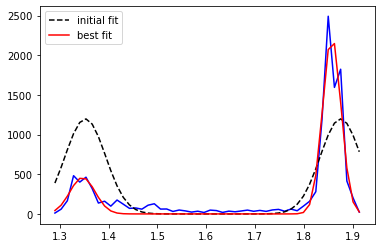

xmax 1:  1.3284500000000001 
 xmax 2:  1.84915


In [3]:
#histogram fit

from lmfit.models import GaussianModel

for i in range(1,6):    #Cicle changing center1 position if condition (center1+2*sigma1 < center2-2*sigma2) is not fulfilled

    #linear = LinearModel(prefix='lin_')
    gauss1 = GaussianModel(prefix='g1_')
    pars = gauss1.make_params(center=x[0]+i*(x[-1]-x[0])/10, sigma=(x[-1]-x[0])/15 , amplitude=max(freq)/20)

    #gauss1 = GaussianModel(prefix='g1_')
    #pars.update(gauss1.make_params())

    gauss2 = GaussianModel(prefix='g2_')
    pars.update(gauss2.make_params())

    pars['g1_center'].set(max = x[0]+(x[-1]-x[0])*0.7, min=min(x))
    pars['g1_sigma'].set(max=(x[-1]-x[0])/10,min=(x[-1]-x[0])/30)
    #pars['g1_amplitude'].set(value=max(freq)/20,min=10)

    pars['g2_center'].set(value=x[-1]*0.98)
    pars['g2_sigma'].set(value=(x[-1]-x[0])/15)
    pars['g2_amplitude'].set(value=max(freq)/20,min=10)

    #mod = linear + gauss1 +gauss2
    mod = gauss1 +gauss2

    init = mod.eval(pars, x=x)
    out = mod.fit(freq, pars, x=x)
    print(out.fit_report())

    plt.plot(x, freq, color='blue')
    plt.plot(x, out.init_fit, 'k--', label='initial fit')
    plt.plot(x, out.best_fit, 'r-', label='best fit')
    plt.legend(loc='best')
    #plt.xlim(30, 150)
    plt.show()
    
    center2=out.best_values.get('g2_center')
    sigma2=out.best_values.get('g2_sigma')
    center1=out.best_values.get('g1_center')
    sigma1=out.best_values.get('g1_sigma')
    
    if center1+2*sigma1 < center2-2*sigma2:
        max_freq1=max(freq[x<center1+sigma1])
        x_max1 = x[np.argmax(freq[x<center1+2*sigma1])]
        max_freq2=max(freq[x>center2-sigma2])
        a=x>center2-sigma2
        freq2=np.zeros(len(freq))
        for i in range(len(a)): 
            if a[i]==True: freq2[i]=freq[i]
        #print(freq2)
        x_max2 = x[np.argmax(freq2)]
        print('xmax 1: ', x_max1,'\n xmax 2: ',x_max2)
        break
    else: print('trying again')